In [319]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

Создание дата-сета с двумя классами

In [165]:
index = np.where((iris.target == 1) | (iris.target == 2))[0]
X = iris.data[50:150]
Y = iris.target[50:150]
Y = Y - 1

In [166]:
data = pd.DataFrame(data=X,)
data['класс'] = Y
data = data.rename(columns={0:'sepal_length',1:'sepal_width',2:'petal_length',3:'petal_width'})
data

,sepal_length,sepal_width,petal_length,petal_width,класс
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,1
96,6.3,2.5,5.0,1.9,1
97,6.5,3.0,5.2,2.0,1
98,6.2,3.4,5.4,2.3,1


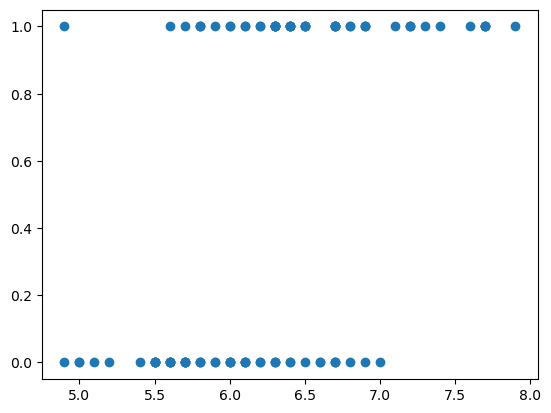

In [167]:
plt.scatter(data['sepal_length'],data['класс'])
plt.show()

L = b + w1x1 + w2x2 + w3x3 + w4x4

p = 1/ 1+ e^ (-L)

In [321]:
start = time.time()

X_numpy = scaler.fit_transform(X) ## приводим к нормализованным признаком с помощью масштабирования

np.random.seed(9)
params = np.random.normal(loc=0.0, scale=0.1, size=(5,)) ## генерируем случайные значения параметров 
list_params_gd = [params.copy()]

costs = []
preds = []
EPOCHS = 20000
LEARNING_RATE = 0.01
accuracy_list = []

for i in range(EPOCHS):
    L = params[0] + np.dot(X_numpy, params[1:]) ## функция np.dot умножает вектор параметров на матрицу значений 
    pred = 1 / (1 + np.exp(-L)) ## считаем предсказания (вероятности принадлежать к классу 0 и 1)
    preds.append(pred)

    cost = np.sum(-((Y * np.log(pred)) + ((1 - Y) * np.log(1 - pred)))) / len(pred) ## считаем ошибку
    costs.append(cost)

    error = pred - Y
    params[0] -= LEARNING_RATE * np.sum(error) / len(Y) ## обновляем параметры смещения
    params[1:] -= LEARNING_RATE * np.dot(X_numpy.T, error) / len(Y) ## обновляем параметры весов

    list_params_gd.append(params.copy())

end = time.time()
time_ = end - start

Строим функцию потерь

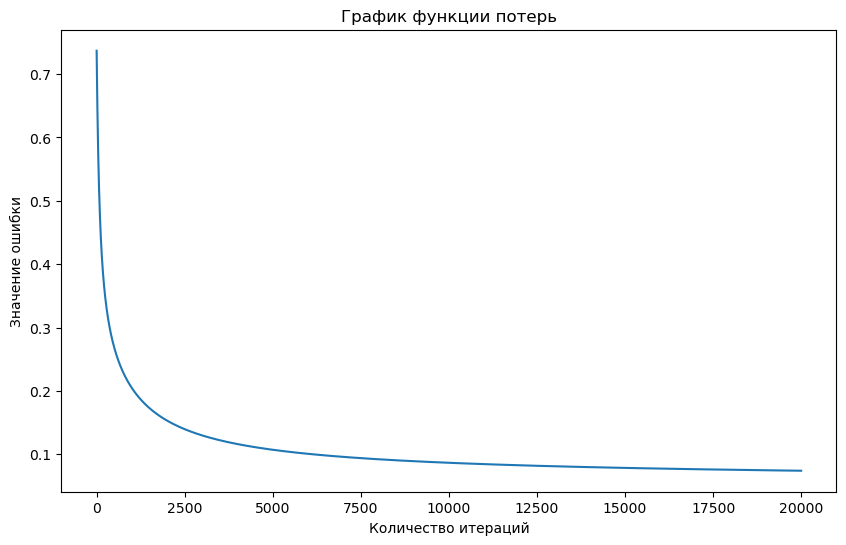

In [218]:
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.title('График функции потерь')
plt.xlabel('Количество итераций')
plt.ylabel('Значение ошибки')
plt.show()



Визуализируем обученную модель логистической регрессии

Для того, чтобы сделать визуализацию модели, обученной на 4 признаках, необходимо отсортировать все значения по функции L, так как сигмоида — это функция от L и чтобы корректно её нарисовать, значения по X должны быть отсортированы — иначе линия будет "скакать", а не идти плавно слева направо

[-0.36378451 -1.61854127 -2.20319736  7.7473988   7.73078188]


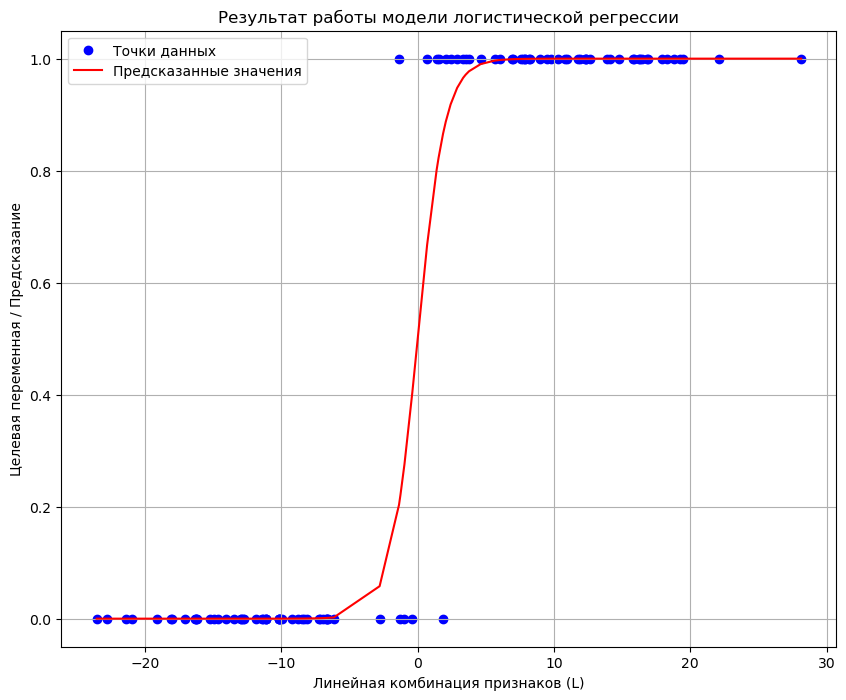

In [246]:
params = list_params_gd[-1]

print(params)
# Вычисляем линейную комбинацию L и предсказания сигмоиды для последних установленных параметров - конечный результат обучения
L = params[0] + np.dot(X_numpy, params[1:])
pred = 1 / (1 + np.exp(-L))

# Сортируем по L для гладкой линии
sorted_idx = np.argsort(L) ## получаем индексы, которые идут в порядке отсортированных данных

L_sorted = L[sorted_idx] ## сортируем  - теперь значения идут слева направо по оси X
pred_sorted = pred[sorted_idx] ## сортируем таким же образом предсказания
Y_sorted = Y[sorted_idx] ## и метки

# Рисуем график
plt.figure(figsize=(10, 8))
plt.scatter(L_sorted, Y_sorted, color='blue', label='Точки данных')
plt.plot(L_sorted, pred_sorted, color='red', label='Предсказанные значения')
plt.xlabel('Линейная комбинация признаков (L)')
plt.ylabel('Целевая переменная / Предсказание')
plt.title('Результат работы модели логистической регрессии')
plt.legend()
plt.grid(True)
plt.show()

Считаем метрику качества accuracy - долю правильных ответов модели

In [238]:
class_pred = (preds[-1] > 0.5).astype(int)
accuracy_list = Y - class_pred
accuracy = np.sum(accuracy_list == 0)/len(accuracy_list)
print(f"Доля правильных ответов модели - {accuracy}")

Доля правильных ответов модели - 0.97


<div class="alert alert-block alert-danger"> Метод скользящего среднего RMSProp </div>

Суть метода - объединение Adagrad, который уменьшает обновления для параметров, которые часто обновляются, и увеличивает для параметров, которые обновляются не часто (таким образом можно сделать, чтобы "нетипичные" параметры не терялись в "типичных" - например, специфическая должность не терялась в обычных должностях) и метода Nesterov Accelerated Gradient, который позволяет не застревать на плато за счет запоминания последние изменения элемента (то есть для обновлению параметра мы еще добавляем скользящее среднее ранее сделанных обновлений)

<div style="background-color: white "> 
<img src= 'https://tex.s2cms.ru/svg/%0A%5Ctheta_%7Bt%2B1%7D%20%3D%20%5Ctheta_%7Bt%7D%20-%20%5Cfrac%7B%5Ceta%7D%7B%5Csqrt%7BE%5Bg%5E2%5D_t%20%2B%20%5Cepsilon%7D%7D%20g_%7Bt%7D%0A'> </img>
</div>


<div style="background-color: white "> <img src="https://tex.s2cms.ru/svg/%0AE%5Bg%5E2%5D_t%20%3D%20%5Cgamma%20E%5Bg%5E2%5D_%7Bt-1%7D%20%2B%20(1%20-%20%5Cgamma)%20g%5E2_t%0A"></div>


In [318]:
start = time.time()

np.random.seed(9)
params_rms = np.random.normal(loc=0.0, scale=0.1, size=(5,))
list_params_gd_rms = [params_rms.copy()]

costs_rms = []
preds_rms = []
EPOCHS = 1000
LEARNING_RATE = 0.01
accuracy_list = []
gamma = 0.9
epsilent = 1e-8

gd_squared= np.zeros_like(params_rms) ## создаем начальное значение скользящего среднего - массив размерностью как массив params

for i in range(EPOCHS):
    L = params_rms[0] + np.dot(X_numpy, params_rms[1:]) 
    pred_rms = 1 / (1 + np.exp(-L)) 
    preds_rms.append(pred_rms)

    cost_rms = np.sum(-((Y * np.log(pred_rms)) + ((1 - Y) * np.log(1 - pred_rms)))) / len(pred_rms) 
    costs_rms.append(cost_rms)
    error = pred_rms - Y

    gd_param0 = np.sum(error) / len(Y)
    gd_weight = np.dot(X_numpy.T, error) / len(Y)
    gd = np.concatenate([[gd_param0],gd_weight]) ## создаем общий градиент

    gd_squared = gd_squared*gamma + (1-gamma)*(gd**2)
    
    params_rms -= (LEARNING_RATE * gd) / np.sqrt(gd_squared + epsilent)

    list_params_gd_rms.append(params_rms.copy())

end = time.time()
time_rms = end - start

Визуализация

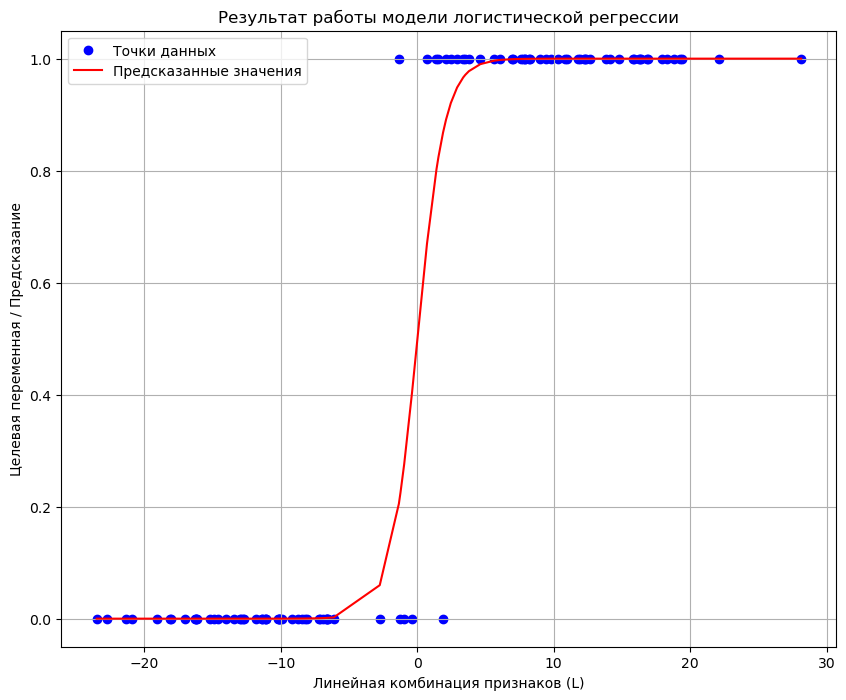

In [298]:
params_1 = list_params_gd_rms[-1]


L = params_1[0] + np.dot(X_numpy, params_1[1:])
pred_rms = 1 / (1 + np.exp(-L))

sorted_idx = np.argsort(L)
L_sorted = L[sorted_idx]
pred_sorted = pred_rms[sorted_idx] 
Y_sorted = Y[sorted_idx]

# Рисуем график
plt.figure(figsize=(10, 8))
plt.scatter(L_sorted, Y_sorted, color='blue', label='Точки данных')
plt.plot(L_sorted, pred_sorted, color='red', label='Предсказанные значения')
plt.xlabel('Линейная комбинация признаков (L)')
plt.ylabel('Целевая переменная / Предсказание')
plt.title('Результат работы модели логистической регрессии')
plt.legend()
plt.grid(True)
plt.show()

Метрика качества accuracy

In [330]:
class_pred = (preds_rms[-1] > 0.5).astype(int)
accuracy_list_rms = Y - class_pred
accuracy_rms = np.sum(accuracy_list_rms == 0)/len(accuracy_list_rms)
print(f"Доля правильных ответов модели - {accuracy_rms}")

Доля правильных ответов модели - 0.98


<div class="alert alert-block alert-danger"> Метод адаптивной оценки моментов Nesterov–accelerated Adaptive Moment Estimation, Nadam </div>

Он сочетает в себе и идею накопления движения и идею более слабого обновления весов для типичных признаков.

Отличие от Nesterov momentum в том, что накапливаем значения градиента и учитываем частоту изменения градиента (для этого вводится дополнительный параметр - средняя нецентрированная дисперсия). 

Отличие от Adam в том, что  Nadam обавляет предсказательный компонент (как в NAG), чтобы сделать шаг не просто в текущем направлении, а в направлении, куда градиент «двинется» на следующем шаге, то есть заглядывать вперед. Такое изменение позволяет быстрее «катиться», если в стороне, куда мы направляемся, производная увеличивается, и медленнее, если наоборот.

По сути NAdam = Adam + Nesterov Accelerated Gradient (NAG)


<div style="background-color: white ">
<img src= 'https://proproprogs.ru/htm/ml/files/ml-optimizatory-gradientnyh-algoritmov-rmsprop-adadelta-adam-nadam.files/image036.png'> </img> 

<img src= 'https://tex.s2cms.ru/svg/%0A%5Chat%7Bm%7D_t%20%3D%20%5Cfrac%7Bm_t%7D%7B1%20-%20%5Cbeta%5Et_1%7D%2C%20%5C%3B%0A%5Chat%7Bv%7D_t%20%3D%20%5Cfrac%7Bv_t%7D%7B1%20-%20%5Cbeta%5Et_2%7D%0A'> </img> 

<img src= 'https://tex.s2cms.ru/svg/%0Av_t%20%3D%20%5Cbeta_2%20v_%7Bt-1%7D%20%2B%20(1%20-%20%5Cbeta_2)%20g_t%5E2%0A'> </img> 

<img src= 'https://tex.s2cms.ru/svg/%0Am_t%20%3D%20%5Cbeta_1%20m_%7Bt-1%7D%20%2B%20(1%20-%20%5Cbeta_1)%20g_t%0A'> </img> 
</div>



In [315]:

start = time.time()

np.random.seed(9)
params_nadam = np.random.normal(loc=0.0, scale=0.1, size=(5,))
list_params_gd_nadam = [params_nadam.copy()]

costs_nadam = []
preds_nadam = []
EPOCHS = 1000
LEARNING_RATE = 0.01
beta1 = 0.9
beta2 = 0.999
epsilent = 1e-8

m = np.zeros_like(params_nadam) ## создаем начальное значение  m и v
v = np.zeros_like(params_nadam)

for i in range(1,EPOCHS + 1):
    L = params_nadam[0] + np.dot(X_numpy, params_nadam[1:]) 
    pred_nadam = 1 / (1 + np.exp(-L)) 
    preds_nadam.append(pred_nadam)

    cost_nadam = np.sum(-((Y * np.log(pred_nadam)) + ((1 - Y) * np.log(1 - pred_nadam)))) / len(pred_nadam) 
    costs_nadam.append(cost_nadam)
    error = pred_nadam - Y

    gd_param0 = np.sum(error) / len(Y)
    gd_weight = np.dot(X_numpy.T, error) / len(Y)
    gd = np.concatenate([[gd_param0],gd_weight]) ## создаем общий градиент

    m = beta1*m + (1-beta1)*gd
    v = beta2*v + (1-beta2)*(gd**2)

    m_t= m / (1-(beta1)**i)
    v_t = v / (1-(beta2)**i)

    momentum = beta1*m_t + ((1-beta1)*gd / (1+beta1)**(i+1)) ## momentum должен быть комбинацией первого момента (m_t) и актуального градиента, как в Nesterov

    params_nadam -= LEARNING_RATE*momentum/ (np.sqrt(v_t + epsilent))


    list_params_gd_nadam.append(params_nadam.copy())

end = time.time()
time_nadam = end - start

Метрика качесват accuracy

In [329]:
class_pred = (preds_nadam[-1] > 0.5).astype(int)
accuracy_list_nadam = Y - class_pred
accuracy_nadam = np.sum(accuracy_list_nadam == 0)/len(accuracy_list_nadam)
print(f"Доля правильных ответов модели - {accuracy_nadam}")

Доля правильных ответов модели - 0.97


Визуализация

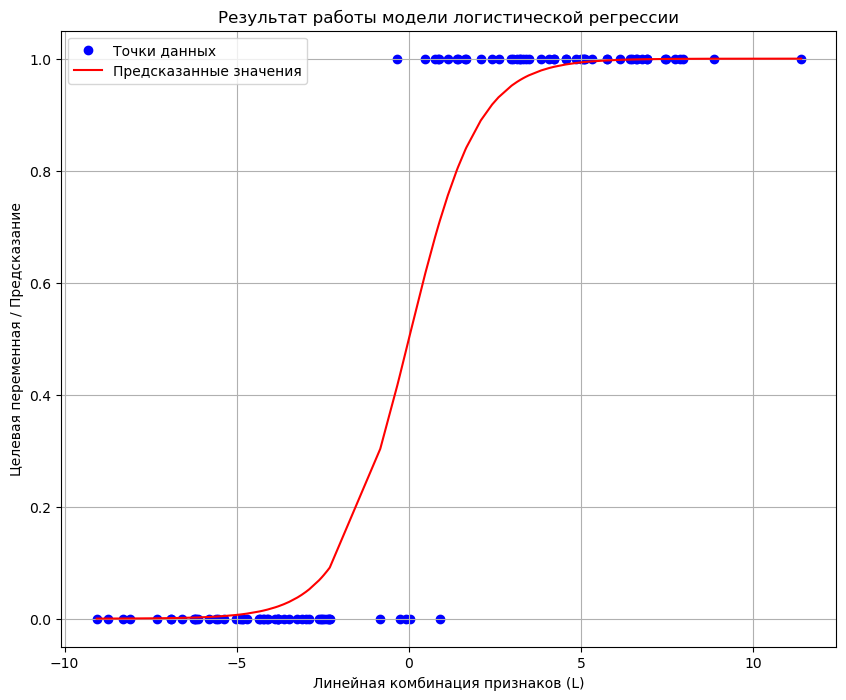

In [297]:
params_1 = list_params_gd_nadam[-1]

L = params_1[0] + np.dot(X_numpy, params_1[1:])
pred_nadam = 1 / (1 + np.exp(-L))


sorted_idx = np.argsort(L) 

L_sorted = L[sorted_idx]
pred_sorted = pred_nadam[sorted_idx]
Y_sorted = Y[sorted_idx]

# Рисуем график
plt.figure(figsize=(10, 8))
plt.scatter(L_sorted, Y_sorted, color='blue', label='Точки данных')
plt.plot(L_sorted, pred_sorted, color='red', label='Предсказанные значения')
plt.xlabel('Линейная комбинация признаков (L)')
plt.ylabel('Целевая переменная / Предсказание')
plt.title('Результат работы модели логистической регрессии')
plt.legend()
plt.grid(True)
plt.show()

Сравним эффективности методов с помощью графиков функции потерь

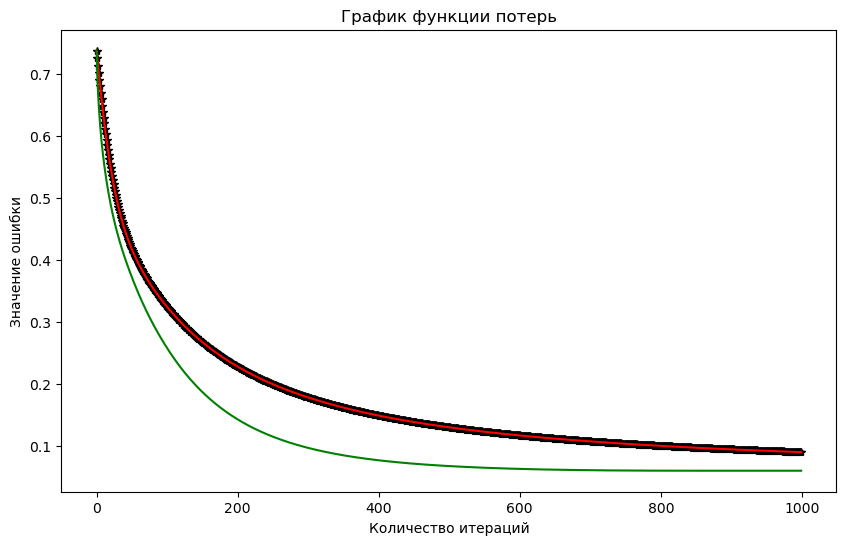

In [313]:
plt.figure(figsize=(10, 6))
plt.plot(costs, marker='*', color = 'black')
plt.plot(costs_nadam,color='red')
plt.plot(costs_rms, color='green')
plt.title('Графики функциq потерь')
plt.xlabel('Количество итераций')
plt.ylabel('Значение ошибки')
plt.show()

<div class="alert alert-block alert-danger"> Вывод </div>

Вывод: исходя из подсчитанных метрик качества и построенных графиков изменения функций потерь для трех ситуаций - стандартное обучение модели логистической регрессии с помощью градиентного спуска без методов оптимизации, с помощью метода оптимизации RMSProp и метода оптимизации Nadam - можно сделать вывод, что наибольшую эффективность применения имеет метод RMSProp, так как при его применении повысилась доля правильных ответов модели (98 процентов) и снизилось значение ошибки при равных количествах итераций. Сводная таблица с временем исполнения кода, метрикой качества и названием метода представлена ниже
 

In [336]:
data_recap = pd.DataFrame({
    'Название метода': ['standart','RMSProp','Nadam'],
    'Метрика качества': [accuracy,accuracy_rms,accuracy_nadam],
    'Время работы алгоритма, с': [time_,time_rms,time_nadam]
})

In [337]:
data_recap

,Название метода,Метрика качества,"Время работы алгоритма, с"
0,standart,0.97,0.561959
1,RMSProp,0.98,1.109128
2,Nadam,0.97,0.056745
